# Data Visualisation

In [1]:
# Betriebssystem
import os
# Plotbibliothek
import matplotlib
import matplotlib.pyplot as plt
# Effizientes Tabellenformat (DataFrames)
import pandas as pd
# Luxus-Plot für DataFrames
from pandas.plotting import scatter_matrix
# Numerik-Bibliothek
import numpy as np
# More plot styles
import seaborn as sns
# Clickable d3.js-Plots
import plotly as py
import plotly.offline as po

# Plots sollen im Notebook erscheinen
%matplotlib inline

## Analyse Emmas trace

In [2]:
df = pd.read_json('https://s3-eu-west-1.amazonaws.com/ifvworkshopdata/emma1000.json')
df.head()

,v,x,y,z
0,-1.0,9.678717,47.992597,557.519958
1,-1.0,9.678717,47.992597,557.519958
2,0.0,9.678639,47.992538,561.268433
3,0.0,9.678639,47.992538,561.268433
4,0.0,9.678639,47.992538,562.678432


Plot velocity histogram with Matplotlib

(array([   2.,    0.,  258.,   28.,  140.,  208.,  201.,   97.,   52.,   14.]),
 array([-1.        , -0.53299999, -0.06599998,  0.40100002,  0.86800003,
         1.33500004,  1.80200005,  2.26900005,  2.73600006,  3.20300007,
         3.67000008]),
 <a list of 10 Patch objects>)

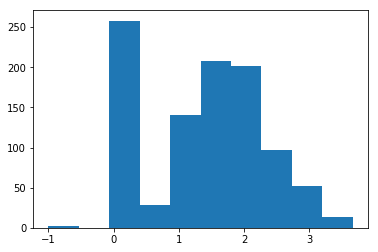

In [3]:
plt.hist(df['v'])

Plot in seaborn - nicer!

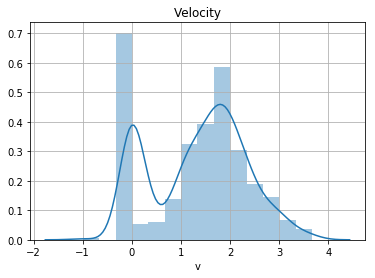

In [4]:
f = plt.figure(111)
ax = sns.distplot(df['v'])
plt.title('Velocity')
ax.grid()
plt.savefig('emmavelocity.png', dpi = 600)

In [5]:
data = [ dict(
        type = 'scatter',
        y = df['v'],
        name = 'velocity',
        line=dict( shape='spline' , filly = 'zero')
        ),
        
        dict(
        type = 'area',
        y = df['z']-550,
        name = 'Rel. altitude',
            line=dict(shape='spline' ,
                     smoothing = .05)
        )
       ]
layout = dict(
        title = 'Emmas velocity',
        yaxis=dict(
        range=[0, 10]
    ),
    )
fig = dict( data=data, layout=layout )
po.plot(fig, validate=False, filename='emmavelocity.html')

'file:///Users/raphael/sciebo/Vorlesungen/xxxxx_MiniWS/ifvMiniWorkshop/emmavelocity.html'

## Trying DB open data set

In [6]:
df = pd.read_csv(
    'http://download-data.deutschebahn.com/static/datasets/haltestellen/D_Bahnhof_2017_09.csv',
    sep = ';',decimal=",")
df.head()

,EVA_NR,DS100,IFOPT,NAME,VERKEHR,LAENGE,BREITE,STATUS
0,8000001,KA,de:05334:1008,Aachen Hbf,FV,6.091499,50.767800,NaN
1,8000002,TA,de:08136:1000,Aalen Hbf,FV,10.096271,48.841013,NaN
2,8000004,HA,de:05774:7131,Altenbeken,FV,8.943319,51.766433,NaN
3,8000007,FALZ,de:07331:55,Alzey,RV,8.109749,49.750200,NaN
4,8000009,NAN,de:09561:11000,Ansbach,FV,10.578239,49.298032,NaN


Histogram of Latitudes and Longitudes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110a61048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110aecba8>]], dtype=object)

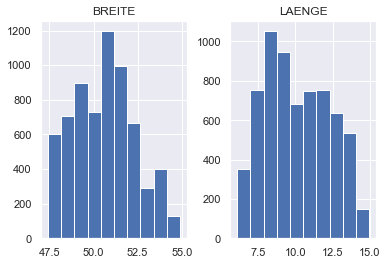

In [8]:
sns.set()
df[["BREITE", "LAENGE"]].hist()

Scatterplot of Stations

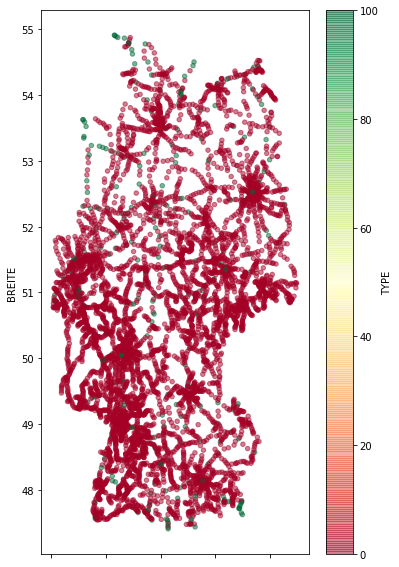

In [7]:
df['TYPE'] = 100*(df['VERKEHR'] == 'FV')
df.plot(kind="scatter", y="BREITE", x="LAENGE", alpha = 0.5, figsize=(6,10), c = "TYPE", cmap = "RdYlGn", legend = True)

Plot station density

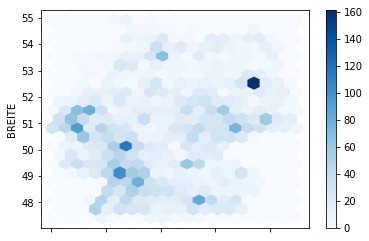

In [8]:
df.plot(kind="hexbin", y="BREITE", x="LAENGE", gridsize = 20, cmap = "Blues", legend = True)

Try yourself, e.g.:
    - ‘line’ : line plot (default)
    - ‘bar’ : vertical bar plot
    - ‘barh’ : horizontal bar plot
    - ‘hist’ : histogram
    - ‘box’ : boxplot
    - ‘kde’ : Kernel Density Estimation plot
    - ‘density’ : same as ‘kde’
    - ‘area’ : area plot
     -‘pie’ : pie plot
    - ‘scatter’ : scatter plot
    - ‘hexbin’ : hexbin plot

Geospatial plot in plotly

In [9]:
df = df[df['VERKEHR'] == 'FV']
data = [ dict(
        type = 'scattergeo',
        locationmode = 'Germany',
        lon = df['LAENGE'],
        lat = df['BREITE'],
        text = df['NAME'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            #colorscale = scl,
            #cmin = 0,
            #color = df['cnt'],
            #cmax = df['cnt'].max(),
            
        ))]

layout = dict(
        title = 'Long distance stations<br>(Hover for station names)',
        colorbar = True,
        geo = dict(
            #scope='usa',
            #projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5,
            lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -30, 15.0 ],
            dtick = 5
            ),
            lataxis = dict (
                showgrid = True,
                gridwidth = 0.5,
                range= [ 45.0, 60.0 ],
                dtick = 5
            )
        ),
    )

fig = dict( data=data, layout=layout )
po.plot(fig, validate=False, filename='d3-stations.html')

'file:///Users/raphael/sciebo/Vorlesungen/xxxxx_MiniWS/ifvMiniWorkshop/d3-stations.html'